In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
import pandas as pd
import os
from Iniciacion import SetUp
import fastf1

In [2]:
setup = SetUp()
carreras = setup.carreras

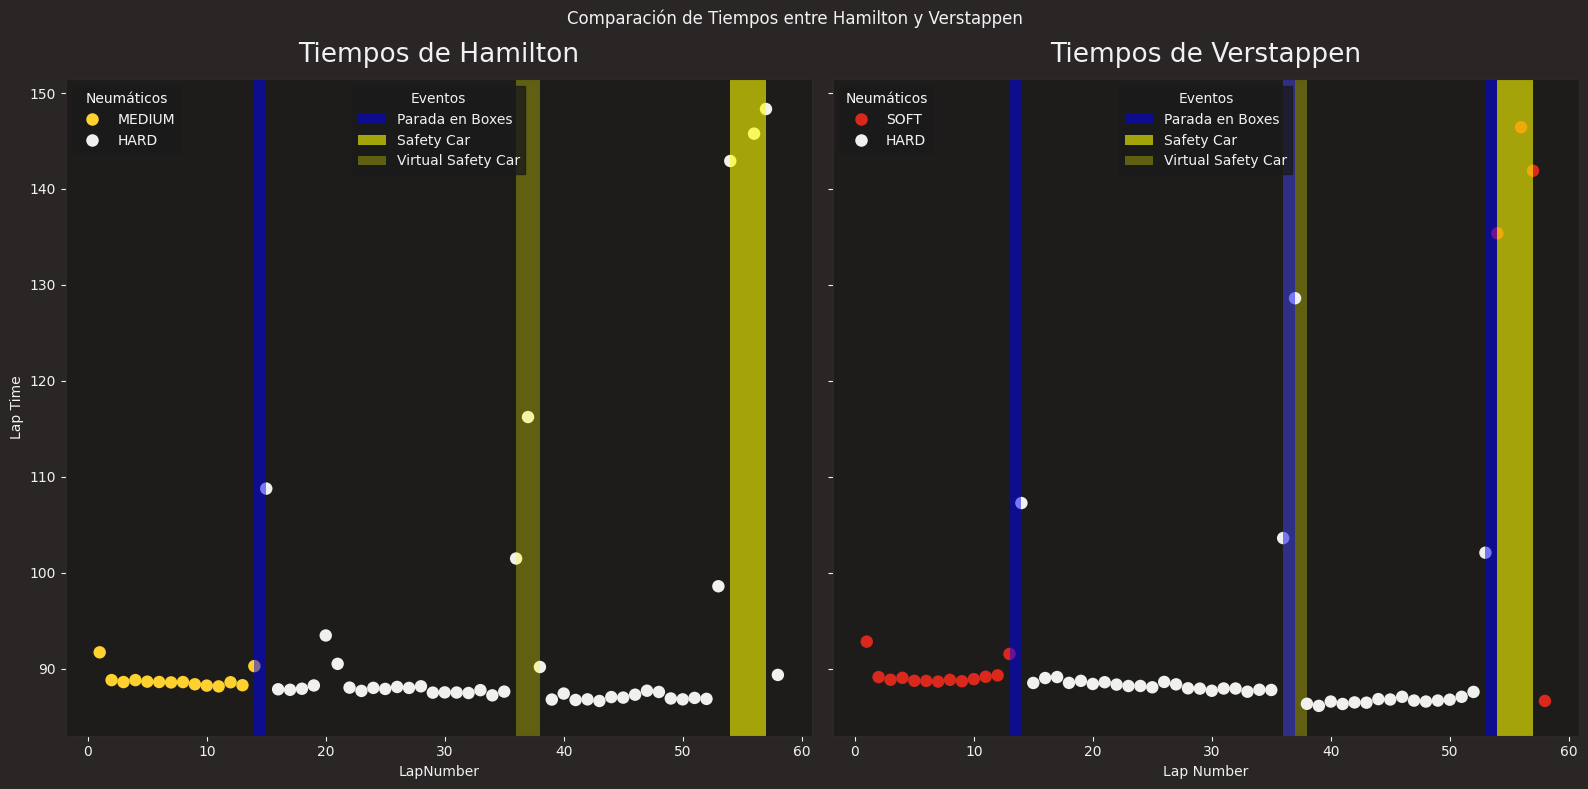

In [3]:
carrera = carreras[2021]["Abu Dhabi Grand Prix"]

ham_laps = carrera.laps.pick_driver("HAM").reset_index()
ham_laps["lapTime"] = ham_laps['LapTime'].dt.total_seconds()

ver_laps = carrera.laps.pick_driver("VER").reset_index()
ver_laps["lapTime"] = ver_laps['LapTime'].dt.total_seconds()

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

scatter_ham = sns.scatterplot(data=ham_laps,
                              x="LapNumber",
                              y="lapTime",
                              ax=axes[0],
                              hue="Compound",
                              palette=fastf1.plotting.COMPOUND_COLORS,
                              s=80,
                              linewidth=0,
                              legend='auto')

for _, row in ham_laps.iterrows():
    if not pd.isnull(row['PitInTime']):
        axes[0].axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='blue', alpha=0.5, edgecolor='none')

for _, row in ham_laps[ham_laps['TrackStatus'] == '4'].iterrows():
    if row["LapNumber"] != ham_laps['LapNumber'].max() - 1:
        axes[0].axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='yellow', alpha=0.6, edgecolor='none')

virtual_start_ham = None 

for _, row in ham_laps.iterrows():
    if row['TrackStatus'] == '6':
        virtual_start_ham = row['LapNumber']
    elif row['TrackStatus'] == '7' and virtual_start_ham is not None:
        virtual_end_ham = row['LapNumber']
        axes[0].axvspan(virtual_start_ham, virtual_end_ham, facecolor='yellow', alpha=0.3, edgecolor='none')
        axes[1].axvspan(virtual_start_ham, virtual_end_ham, facecolor='yellow', alpha=0.3, edgecolor='none')
        virtual_start_ham = None 

axes[0].set_ylabel("Lap Time")
axes[0].set_title("Tiempos de Hamilton")

legend_patches_ham = [
    Patch(facecolor='blue', alpha=0.5, edgecolor='none', label='Parada en Boxes'),
    Patch(facecolor='yellow', alpha=0.6, edgecolor='none', label='Safety Car'),
    Patch(facecolor='yellow', alpha=0.3, edgecolor='none', label='Virtual Safety Car'),
]

legend1_ham = axes[0].legend(handles=legend_patches_ham, loc='upper center', title='Eventos')

handles_ham, labels_ham = scatter_ham.get_legend_handles_labels()
legend2_ham = axes[0].legend(handles_ham[0:], labels_ham[0:], title='Neumáticos', loc='upper left')

axes[0].add_artist(legend1_ham)
axes[0].add_artist(legend2_ham)

scatter_ver = sns.scatterplot(data=ver_laps,
                              x="LapNumber",
                              y="lapTime",
                              ax=axes[1],
                              hue="Compound",
                              palette=fastf1.plotting.COMPOUND_COLORS,
                              s=80,
                              linewidth=0,
                              legend='auto')

for _, row in ver_laps.iterrows():
    if not pd.isnull(row['PitInTime']):
        axes[1].axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='blue', alpha=0.5, edgecolor='none')

for _, row in ver_laps[ver_laps['TrackStatus'] == '4'].iterrows():
    if row["LapNumber"] != ham_laps['LapNumber'].max() - 1:
        axes[1].axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='yellow', alpha=0.6, edgecolor='none')


axes[1].set_xlabel("Lap Number")
axes[1].set_title("Tiempos de Verstappen")

legend_patches_ver = [
    Patch(facecolor='blue', alpha=0.5, edgecolor='none', label='Parada en Boxes'),
    Patch(facecolor='yellow', alpha=0.6, edgecolor='none', label='Safety Car'),
    Patch(facecolor='yellow', alpha=0.3, edgecolor='none', label='Virtual Safety Car'),
]


legend1_ver = axes[1].legend(handles=legend_patches_ver, loc='upper center', title='Eventos')

handles_ver, labels_ver = scatter_ver.get_legend_handles_labels()
legend2_ver = axes[1].legend(handles_ver[0:], labels_ver[0:], title='Neumáticos', loc='upper left')

axes[1].add_artist(legend1_ver)
axes[1].add_artist(legend2_ver)

plt.suptitle("Comparación de Tiempos entre Hamilton y Verstappen")
plt.tight_layout()

plt.show()

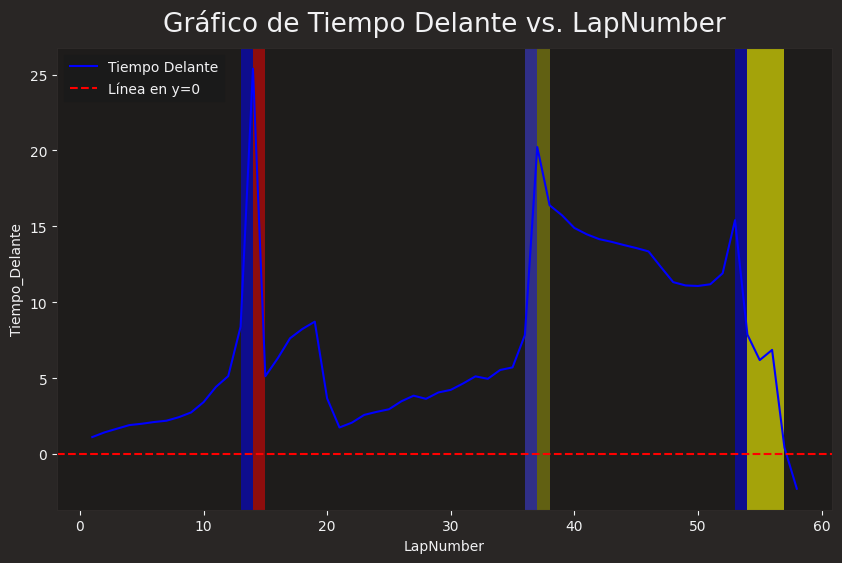

In [4]:
carrera = carreras[2021]["Abu Dhabi Grand Prix"]

ham_laps = carrera.laps.pick_driver("HAM").reset_index()
ver_laps = carrera.laps.pick_driver("VER").reset_index()


abu_dhabi_laps = pd.concat([ham_laps, ver_laps], ignore_index=True)
abu_dhabi_laps["tiempo"] = abu_dhabi_laps["Time"].dt.total_seconds()
abu_dhabi_laps['Tiempo_Delante'] = abu_dhabi_laps.groupby('LapNumber')['tiempo'].diff(1)
columna_tiempo_ver = abu_dhabi_laps.loc[abu_dhabi_laps['Driver'] == 'VER', ['Tiempo_Delante',"LapNumber"]]


plt.figure(figsize=(10, 6))

virtual_start_ham = None
virtual_end_ham = None

for _, row in ham_laps.iterrows():
    if row['TrackStatus'] == '6':
        virtual_start_ham = row['LapNumber']
    elif row['TrackStatus'] == '7' and virtual_start_ham is not None:
        virtual_end_ham = row['LapNumber']
        plt.axvspan(virtual_start_ham, virtual_end_ham, facecolor='yellow', alpha=0.3, edgecolor='none')
        virtual_start_ham = None

for _, row in ham_laps[ham_laps['TrackStatus'] == '4'].iterrows():
    if row["LapNumber"] != ham_laps['LapNumber'].max() -1:
        plt.axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='yellow', alpha=0.6, edgecolor='none')

for _, row in ver_laps.iterrows():
    if not pd.isnull(row['PitInTime']):
        plt.axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='blue', alpha=0.5, edgecolor='none')

for _, row in ham_laps.iterrows():
    if not pd.isnull(row['PitInTime']):
        plt.axvspan(row['LapNumber'], row['LapNumber']+1, facecolor='red', alpha=0.5, edgecolor='none')


plt.plot(columna_tiempo_ver['LapNumber'], columna_tiempo_ver['Tiempo_Delante'], color='blue', label='Tiempo Delante')
plt.axhline(y=0, color='red', linestyle='--', label='Línea en y=0')

plt.xlabel('LapNumber')
plt.ylabel('Tiempo_Delante')
plt.title('Gráfico de Tiempo Delante vs. LapNumber')

plt.legend()

plt.show()

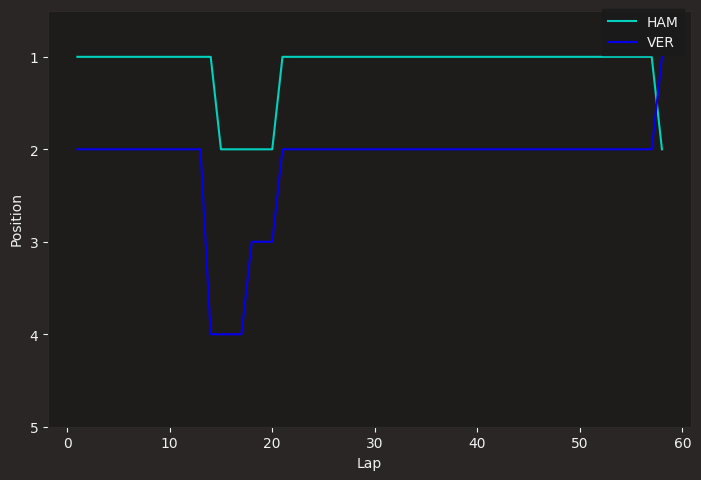

In [5]:
carrera = carreras[2021]["Abu Dhabi Grand Prix"]
fig, ax = plt.subplots(figsize=(8.0, 4.9))

ham_laps = carrera.laps.pick_driver("HAM").reset_index()

abb = ham_laps['Driver'].iloc[0]
color = fastf1.plotting.driver_color(abb)

ax.plot(ham_laps['LapNumber'], ham_laps['Position'],
            label=abb, color=color)

ver_laps = carrera.laps.pick_driver("VER").reset_index()

abb = ver_laps['Driver'].iloc[0]
color = fastf1.plotting.driver_color(abb)

ax.plot(ver_laps['LapNumber'], ver_laps['Position'],
            label=abb, color=color)

ax.set_ylim([2.5, 0.5])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1456\301867053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ham_laps["lapTime"] = ham_laps['LapTime'].dt.total_seconds()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1456\301867053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ver_laps["lapTime"] = ver_laps['LapTime'].dt.total_seconds()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_1456\301867053.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

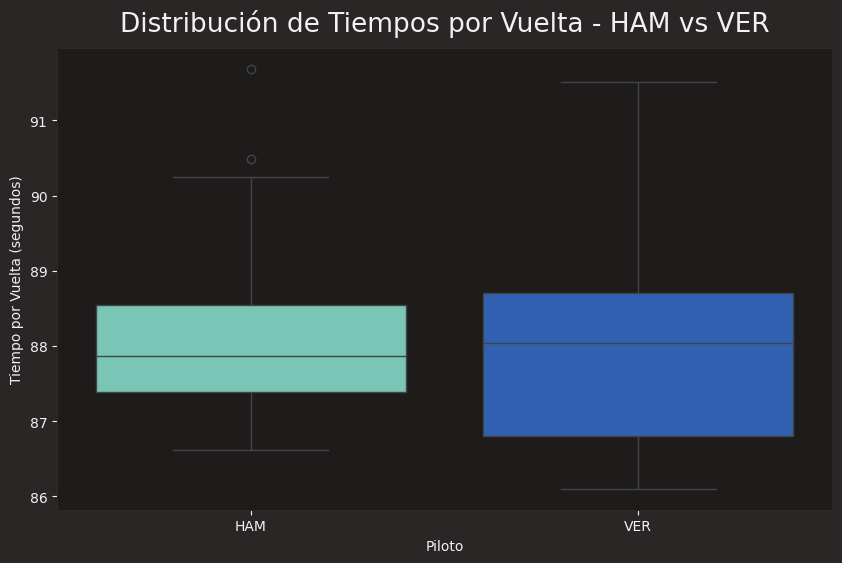

In [6]:
carrera = carreras[2021]["Abu Dhabi Grand Prix"]
ham_laps = carrera.laps.pick_driver("HAM").pick_quicklaps()
ham_laps["lapTime"] = ham_laps['LapTime'].dt.total_seconds()

ver_laps = carrera.laps.pick_driver("VER").pick_quicklaps()
ver_laps["lapTime"] = ver_laps['LapTime'].dt.total_seconds()

combined_data = pd.concat([ham_laps.assign(Driver='HAM'), ver_laps.assign(Driver='VER')])

combined_data = combined_data[~combined_data.index.duplicated()]

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='Driver', y='lapTime', palette={'HAM': '#6CD3BF', 'VER': '#1E5BC6'})
plt.xlabel('Piloto')
plt.ylabel('Tiempo por Vuelta (segundos)')
plt.title('Distribución de Tiempos por Vuelta - HAM vs VER')
plt.show()